# Importing Libraries

In [ ]:
!pip install yfinance
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.2 MB/s eta 0:00:00


In [ ]:
from datetime import datetime
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Data Exploration and Analysis

In [ ]:
sp_500=pd.read_csv('/content/S&P500.csv')
sp_500.head()

,Sno,Company,Symbol,Portfolio%,Price
0,1,Microsoft Corp,MSFT,7.19%,425.52
1,2,Apple Inc.,AAPL,5.67%,169.58
2,3,Nvidia Corp,NVDA,4.91%,880.08
3,4,Amazon.com Inc,AMZN,3.81%,185.07
4,5,"Meta Platforms, Inc. Class A",META,2.60%,527.34


In [ ]:
# Define the start date as January 1, 2019
start_date = datetime(2019, 1, 1)

# Define the end date as April 5, 2024
end_date = datetime(2024, 4, 5)

In [ ]:
# Initialize an empty dictionary to store stock proportions
stocks_prop = {}

# Iterate through each row in the sp_500 DataFrame to calculate stock proportions
for i in range(len(sp_500)):
    # Extract the stock symbol and portfolio percentage from each row
    symbol = sp_500.loc[i, 'Symbol']
    portfolio_percentage = float(sp_500.loc[i, 'Portfolio%'].replace('%', '')) / 100

    # Store the stock symbol and its corresponding portfolio percentage in the dictionary
    stocks_prop[symbol] = portfolio_percentage

# Initialize an empty DataFrame to store stock price data
df_data = pd.DataFrame()

# Iterate through each stock in the stocks_prop dictionary to download historical data
for stock, prop in stocks_prop.items():
    # Download historical stock price data using Yahoo Finance API
    data = yf.download(stock, start=start_date, end=end_date)

    # Extract and store the adjusted closing prices in the DataFrame
    df_data[stock] = data['Adj Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******************

In [ ]:
# Visualize the head
df_data.head()

,MSFT,AAPL,NVDA,AMZN,META,GOOGL,BRK.B,GOOG,LLY,AVGO,...,FRT,DVA,HAS,CMA,RL,BIO,MHK,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,95.846031,37.845036,33.788891,76.956497,135.536194,52.734001,NaN,52.292500,105.797363,213.875458,...,93.744598,51.730000,66.340302,54.153778,94.438438,228.080002,118.599998,39.689266,NaN,10.888427
2019-01-03,92.320038,34.075397,31.747471,75.014000,131.600372,51.273499,NaN,50.803001,102.509613,194.851044,...,94.375984,50.980000,64.615036,53.796581,90.175102,224.300003,116.900002,40.097809,NaN,10.747748
2019-01-04,96.613785,35.530056,33.781448,78.769501,137.803787,53.903500,NaN,53.535500,105.594772,196.766129,...,95.436378,54.000000,67.012154,55.520424,93.856255,226.279999,122.129997,41.001797,NaN,11.216673
2019-01-07,96.736992,35.450970,35.569870,81.475502,137.903687,53.796001,NaN,53.419498,106.165749,200.773483,...,96.666779,54.369999,69.085838,56.009624,95.566978,233.669998,124.150002,41.436420,NaN,11.441754
2019-01-08,97.438393,36.126770,34.684338,82.829002,142.378937,54.268501,NaN,53.813999,107.141930,199.162064,...,98.730942,54.060001,70.844276,56.157177,97.026909,235.529999,123.059998,42.044884,NaN,11.554297


In [ ]:
# Save DataFrame df_data to a CSV file named 'all_stocks.csv'
df_data.to_csv('all_stocks.csv')

# Read the CSV file back into a DataFrame df_data
df_data = pd.read_csv('/content/all_stocks.csv')

# Convert the 'Date' column from string to datetime type
df_data['Date'] = pd.to_datetime(df_data['Date'])

# Set the 'Date' column as the index of the DataFrame
df_data.set_index('Date', inplace=True)

In [ ]:
# Filter the DataFrame df_data to get exact 5 financial years of data
# Select rows starting from the 59th row to the second-to-last row
df_data_last = df_data[58:-1]

# Display the first few rows of the filtered DataFrame
df_data_last.head()


,MSFT,AAPL,NVDA,AMZN,META,GOOGL,BRK.B,GOOG,LLY,AVGO,...,FRT,DVA,HAS,CMA,RL,BIO,MHK,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-27,111.152458,45.359962,43.825325,88.285004,165.694199,58.900501,NaN,58.651001,119.231941,251.927628,...,111.780495,53.480000,70.886856,56.570316,112.262085,302.420013,126.129997,41.510242,33.350155,11.708044
2019-03-28,111.304779,45.420132,44.011559,88.670998,165.374542,58.613499,NaN,58.424500,119.398598,254.566345,...,113.175301,53.520000,71.463181,57.227943,116.479286,303.750000,125.980003,41.257233,32.861874,11.764742
2019-03-29,112.266182,45.716160,44.585125,89.037498,166.513336,58.844501,NaN,58.665501,120.148575,255.962265,...,112.441216,54.290001,71.012154,57.400185,116.731323,305.679993,126.150002,41.466629,33.055351,11.802541
2019-04-01,113.294228,46.026634,45.260509,90.709503,168.521194,59.949001,NaN,59.721500,119.491188,260.286316,...,111.935493,54.919998,71.563408,59.560902,116.110237,307.399994,127.879997,42.059872,33.304092,11.915936
2019-04-02,113.456032,46.695698,45.439293,90.698997,174.015366,60.277000,NaN,60.024502,119.741211,257.954224,...,112.245438,54.599998,71.095673,60.226337,114.579979,309.140015,127.360001,41.824318,32.889519,11.793091


In [ ]:
# Check the shape of the filtered DataFrame df_data_last
df_data_last.shape

(1264, 503)

In [ ]:
# Drop columns with any NaN values from the DataFrame df_data_last
df_data_last = df_data_last.dropna(axis=1, how='any')

# Display the first few rows of the updated DataFrame
df_data_last.head()

,MSFT,AAPL,NVDA,AMZN,META,GOOGL,GOOG,LLY,AVGO,JPM,...,FRT,DVA,HAS,CMA,RL,BIO,MHK,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-27,111.152458,45.359962,43.825325,88.285004,165.694199,58.900501,58.651001,119.231941,251.927628,85.235703,...,111.780495,53.480000,70.886856,56.570316,112.262085,302.420013,126.129997,41.510242,33.350155,11.708044
2019-03-28,111.304779,45.420132,44.011559,88.670998,165.374542,58.613499,58.424500,119.398598,254.566345,86.202934,...,113.175301,53.520000,71.463181,57.227943,116.479286,303.750000,125.980003,41.257233,32.861874,11.764742
2019-03-29,112.266182,45.716160,44.585125,89.037498,166.513336,58.844501,58.665501,120.148575,255.962265,86.648033,...,112.441216,54.290001,71.012154,57.400185,116.731323,305.679993,126.150002,41.466629,33.055351,11.802541
2019-04-01,113.294228,46.026634,45.260509,90.709503,168.521194,59.949001,59.721500,119.491188,260.286316,89.566811,...,111.935493,54.919998,71.563408,59.560902,116.110237,307.399994,127.879997,42.059872,33.304092,11.915936
2019-04-02,113.456032,46.695698,45.439293,90.698997,174.015366,60.277000,60.024502,119.741211,257.954224,89.994804,...,112.245438,54.599998,71.095673,60.226337,114.579979,309.140015,127.360001,41.824318,32.889519,11.793091


In [ ]:
# Check the modified shape of the filtered DataFrame df_data_last
df_data_last.shape

(1264, 490)

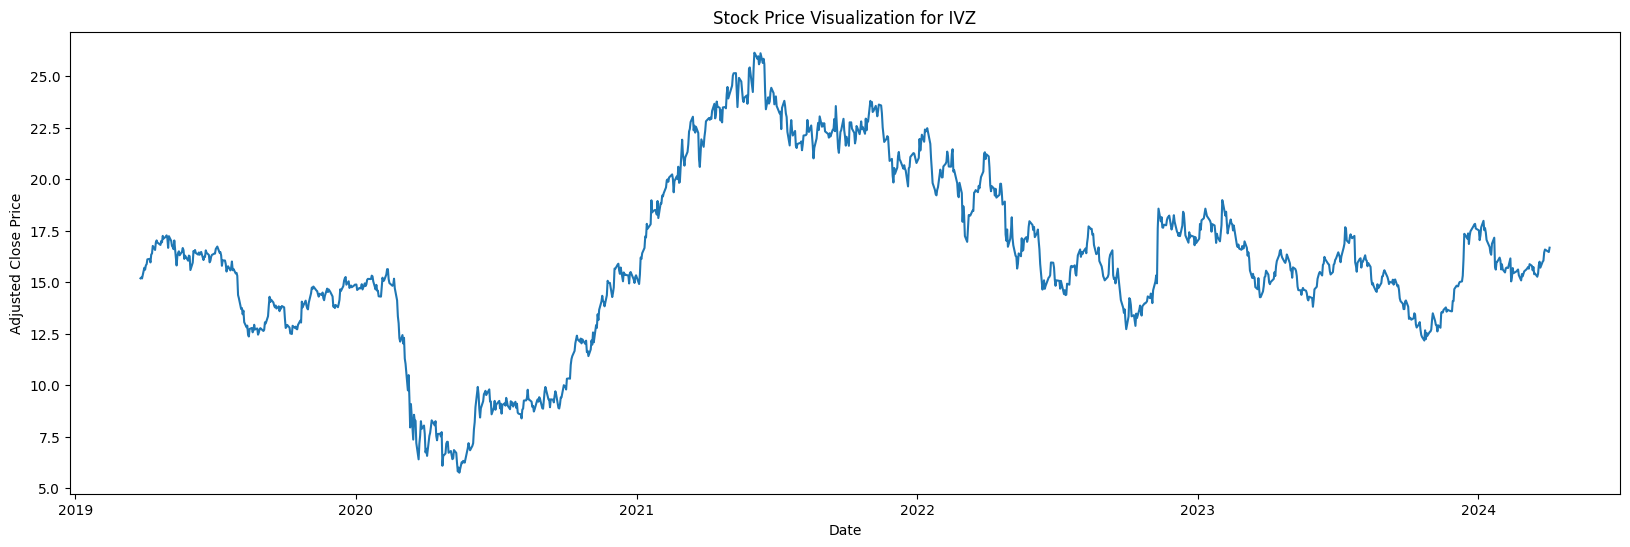

In [ ]:
import matplotlib.pyplot as plt

# Set the width and height of the figure
plt.figure(figsize=(20, 6))  # Adjust the width and height as needed

# Plot the stock data for 'IVZ'
plt.plot(df_data_last['IVZ'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Stock Price Visualization for IVZ')

# Display the plot
plt.show()

In [ ]:
# Get the column names (company codes) from the DataFrame df_data_last
cols = df_data_last.columns

# Display 10 the company codes
print(cols[:10])

Index(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'META', 'GOOGL', 'GOOG', 'LLY', 'AVGO',
       'JPM'],
      dtype='object')


# Time Series Analysis

In [ ]:
# Initialize an empty DataFrame to store trend data for each stock
df_trend = pd.DataFrame()

# Iterate through each stock code in cols (company codes)
for stock in cols:
    # Create a pandas Series using stock data with date index
    series = pd.Series(df_data_last[stock], index=df_data_last.index)

    # Perform seasonal decomposition on the stock's data using a period of 7 days
    result = seasonal_decompose(series, model='additive', period=7)

    # Store the trend component of the decomposition in df_trend DataFrame
    df_trend[stock] = result.trend

<ipython-input-30-30637a7d4a64>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_trend[stock] = result.trend
<ipython-input-30-30637a7d4a64>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_trend[stock] = result.trend
<ipython-input-30-30637a7d4a64>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.cop

In [ ]:
# Display the first few rows of the df_trend DataFrame
df_trend.head()

,MSFT,AAPL,NVDA,AMZN,META,GOOGL,GOOG,LLY,AVGO,JPM,...,FRT,DVA,HAS,CMA,RL,BIO,MHK,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01,112.755723,46.190291,45.243130,89.911429,169.901162,59.728215,59.504715,118.850978,256.670018,88.409786,...,112.271075,54.455714,71.298517,58.831709,115.188861,305.724287,127.144286,42.003791,33.051399,11.818740
2019-04-02,113.179997,46.483570,45.755697,90.422714,171.306813,59.967072,59.748500,118.615525,257.680505,89.208979,...,112.490143,54.808571,71.500169,59.432284,115.558565,306.608568,127.924286,42.351516,33.154055,11.852488


In [ ]:
# Save the df_trend DataFrame to a CSV file named 'trends.csv'
df_trend.to_csv('trends.csv')

In [ ]:
year = '22_24'

# Load data from CSV file into DataFrame df_trend
df_trend = pd.read_csv(f'/content/trend_{year}.csv')

# Convert 'Date' column to datetime type with the specified format
df_trend['Date'] = pd.to_datetime(df_trend['Date'], format='%d-%m-%Y')

# Set 'Date' column as the index of the DataFrame
df_trend.set_index('Date', inplace=True)

# Display the first few rows of the updated DataFrame
df_trend.head()


,MSFT,AAPL,NVDA,AMZN,META,GOOGL,GOOG,LLY,AVGO,JPM,...,FRT,DVA,HAS,CMA,RL,BIO,MHK,PARA,FOX,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-01,304.819035,173.867379,268.294554,164.761568,227.465801,140.538929,141.160786,286.368395,594.230617,127.800167,...,112.699735,114.430000,77.258005,81.627653,108.174831,573.907139,127.261428,35.282961,35.131991,22.110899
2022-04-04,302.848969,172.904105,261.948240,163.114354,226.479704,139.593645,140.191500,289.171827,589.018433,126.581281,...,112.144874,114.811429,77.028678,80.708854,105.854747,575.998561,124.754284,34.896317,34.824059,21.896707
2022-04-05,300.479013,171.819358,255.426429,161.422854,225.691969,138.357788,138.958071,292.221470,583.037040,125.771145,...,111.736579,115.874286,77.010437,80.161948,104.035310,578.417132,123.621428,34.605322,34.676305,21.703513
2022-04-06,297.244694,170.567945,247.766050,159.726353,224.850004,136.894359,137.550498,295.381622,576.380049,125.459127,...,111.544210,116.771429,77.229343,79.989511,102.896640,582.199995,123.635715,34.349355,34.569979,21.557918
2022-04-07,293.405605,169.628677,240.335379,157.901712,223.321625,135.117788,135.789712,297.537358,570.694388,125.085511,...,111.061323,117.495715,77.009136,79.725711,102.058904,580.392848,123.584286,34.168831,34.492651,21.427722


In [ ]:
# Initialize an empty DataFrame to store regression results
# df_regressed = pd.DataFrame(columns=['stock', 'slot', 'gradient', 'r2'])

# Get the column names (stock symbols) from the df_trend DataFrame
cols = df_trend.columns

# Generate x values for regression (indices of df_trend)
x = [i for i in range(df_trend.shape[0])]

# Iterate through each stock symbol in cols
for stock in cols:
    # Perform linear regression using polyfit
    order = 1  # polynomial of order 1 for a straight line
    c = np.polyfit(x, df_trend[stock], order)

    # Extract the gradient (slope) from the regression coefficients
    gradient = float('{0:.2f}'.format(c[0]))

    # Calculate the estimated regression line (y values)
    yfit = np.polyval(c, x)

    # Calculate Total Sum-Of-Squares (SStot)
    SStot = np.sum((df_trend[stock] - np.mean(df_trend[stock]))**2)

    # Calculate Residual Sum-Of-Squares (SSres)
    SSres = np.sum((df_trend[stock] - yfit)**2)

    # Calculate R-squared (coefficient of determination)
    Rsq = 1 - (SSres / SStot)

    # Create a new row for the DataFrame with regression results
    new_row = {'stock': stock, 'slot': year, 'gradient': gradient, 'r2': Rsq}

    # Append the new row to the DataFrame
    df_regressed.loc[-1] = [stock, year, gradient, Rsq]
    df_regressed.index = df_regressed.index + 1
    df_regressed = df_regressed.sort_index()

# Display the first few rows of the DataFrame with regression results
df_regressed.head()


,stock,slot,gradient,r2
0,NWS,22_24,0.02,0.617086
1,FOX,22_24,-0.01,0.270764
2,PARA,22_24,-0.03,0.771529
3,MHK,22_24,-0.06,0.274179
4,BIO,22_24,-0.46,0.764405


In [ ]:
# Save the df_regressed DataFrame to a CSV file without including the index
df_regressed.to_csv('regressed_stocks.csv', index=False)

In [ ]:
# Read the saved CSV file back into a DataFrame
df_regressed = pd.read_csv('regressed_stocks.csv')

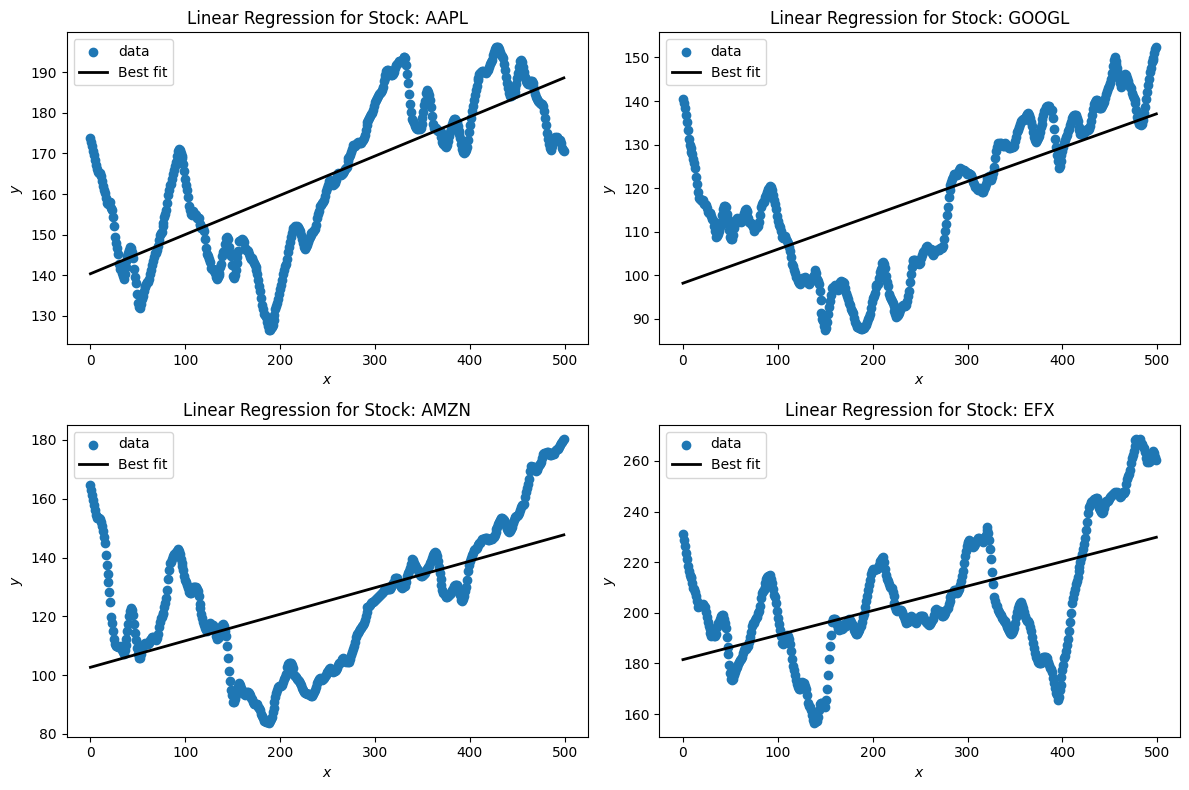

Stock: AAPL
	Best fit gradient: 0.10
	Best fit y-intercept: 140.37

Stock: GOOGL
	Best fit gradient: 0.08
	Best fit y-intercept: 98.20

Stock: AMZN
	Best fit gradient: 0.09
	Best fit y-intercept: 102.67

Stock: EFX
	Best fit gradient: 0.10
	Best fit y-intercept: 181.52



In [ ]:
import matplotlib.pyplot as plt

def perform_linear_regression(x, y):
    """Perform linear regression and return the coefficients."""
    order = 1  # polynomial of order 1 for a straight line
    coefficients = np.polyfit(x, y, order)
    return coefficients

def plot_regression_line(ax, x, y, coefficients, stock_name):
    """Plot the data and the best-fit regression line."""
    ax.scatter(x, y, label="data")  # plot the data points
    ax.plot(x, [coefficients[1] + i * coefficients[0] for i in x], 'k', lw=2, label="Best fit")  # plot the best-fit line
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_title(f"Linear Regression for Stock: {stock_name}")
    ax.legend()

def plot_linear_regression(stock_name, x, y):
    """Main function to perform linear regression and plot the results."""
    coefficients = perform_linear_regression(x, y)
    return coefficients  # Return the coefficients for plotting later

# Example usage
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

# Stocks to plot
stocks = ['AAPL', 'GOOGL', 'AMZN', 'EFX']
coefficients_list = []

for idx, stock_name in enumerate(stocks):
    x = [i for i in range(df_trend.shape[0])]
    y = df_trend[stock_name].values

    # Plot on the corresponding subplot
    row = idx // 2
    col = idx % 2
    coefficients = plot_linear_regression(stock_name, x, y)
    plot_regression_line(axs[row, col], x, y, coefficients, stock_name)
    coefficients_list.append(coefficients)  # Collect coefficients for later use

# Adjust layout and show plots
fig.tight_layout()
plt.show()

# Print the best-fit gradients and y-intercepts
for idx, stock_name in enumerate(stocks):
    print(f"Stock: {stock_name}")
    print(f"\tBest fit gradient: {coefficients_list[idx][0]:.2f}")
    print(f"\tBest fit y-intercept: {coefficients_list[idx][1]:.2f}")
    print()


# Data Preperataion

In [ ]:
# Filter the required columns and pivot the DataFrame
data_grads = df_regressed[['stock', 'slot', 'gradient']].pivot(index='slot', columns='stock', values='gradient')

# Display the first few rows of the pivoted DataFrame
data_grads.head()

stock,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
slot,,,,,,,,,,,,,,,,,,,,,
19_21,0.11,-0.04,0.19,0.08,0.09,-0.01,0.17,0.53,0.08,0.03,...,0.07,0.01,-0.06,0.02,-0.06,0.04,-0.01,0.06,0.47,0.13
20_22,0.16,0.02,0.18,0.12,0.08,0.04,0.38,0.39,0.15,0.08,...,0.10,0.04,0.02,0.01,0.08,0.10,0.10,0.01,0.72,0.18
21_23,-0.02,-0.02,0.02,0.12,-0.04,0.05,-0.09,-0.65,0.02,0.07,...,-0.01,-0.01,-0.07,0.01,0.14,-0.05,0.01,-0.09,-0.70,-0.09
22_24,-0.00,-0.00,0.10,0.05,0.00,0.10,0.16,0.53,0.09,-0.05,...,0.09,-0.00,0.09,-0.03,0.05,0.06,0.05,0.02,-0.18,0.05


In [ ]:
# Calculate the correlation matrix
correl = data_grads.corr()

# Print the correlation matrix
print(correl)


stock         A       AAL      AAPL      ABBV       ABT      ACGL       ACN  \
stock                                                                         
A      1.000000  0.253562  0.906708  0.280058  0.941128 -0.593567  0.852283   
AAL    0.253562  1.000000  0.081379  0.189661  0.020520  0.572598  0.590884   
AAPL   0.906708  0.081379  1.000000 -0.138909  0.986886 -0.535870  0.851331   
ABBV   0.280058  0.189661 -0.138909  1.000000 -0.003892 -0.358378 -0.048393   
ABT    0.941128  0.020520  0.986886 -0.003892  1.000000 -0.652096  0.803260   
...         ...       ...       ...       ...       ...       ...       ...   
XYL    0.729948  0.590119  0.809770 -0.258579  0.728627  0.040781  0.974205   
YUM    0.422286  0.983611  0.253116  0.206720  0.199105  0.433827  0.719360   
ZBH    0.603907 -0.080978  0.883042 -0.583615  0.814197 -0.312982  0.687820   
ZBRA   0.968471  0.255262  0.974363  0.035452  0.971890 -0.493154  0.916775   
ZTS    0.915710  0.317647  0.970704 -0.105949  0.940

In [ ]:
def find_similar_values(correl_matrix, threshold):
    """Find similar values based on a correlation matrix and threshold."""
    similar_values_dict = {}

    # Iterate through the upper triangle of the correlation matrix
    for i, col1 in enumerate(correl_matrix.columns):
        for j, col2 in enumerate(correl_matrix.columns[i + 1:], start=i + 1):
            correlation_value = correl_matrix.iloc[i, j]
            if correlation_value >= threshold:
                # Add similar values to the dictionary
                similar_values_dict.setdefault(col1, []).append((col2, correlation_value))
                # Add symmetric pair for the lower triangle
                similar_values_dict.setdefault(col2, []).append((col1, correlation_value))

    return similar_values_dict

# Set the threshold value
threshold = 0.85

# Call the function to find similar values
similar_values_dict = find_similar_values(correl, threshold)

# Print the dictionary
print("Similar Values Dictionary:")
print(similar_values_dict)

Similar Values Dictionary:
{'A': [('AAPL', 0.9067076504065723), ('ABT', 0.9411275027984374), ('ACN', 0.852283226147856), ('AIZ', 0.9527365721987818), ('ALGN', 0.8816326464590435), ('AMT', 0.9527647977431796), ('APTV', 0.9788820729608508), ('ARE', 0.9953519727429373), ('AVY', 0.9153485853484455), ('AWK', 0.9481126404789296), ('BAC', 0.8856399375803038), ('BALL', 0.8919414277671469), ('BAX', 0.9717884785134195), ('BBWI', 0.9462284648732256), ('BIO', 0.9451106723691359), ('BLK', 0.8680100762188959), ('CBRE', 0.8673210871549107), ('CCI', 0.9080917034484575), ('CFG', 0.8900696141586217), ('CPT', 0.8577386956986703), ('CRL', 0.94860599841526), ('CTLT', 0.9388850343253557), ('CTSH', 0.9116650288651584), ('CZR', 0.9209009645433572), ('DE', 0.9623391385381458), ('DGX', 0.9677698908922538), ('DHR', 0.9977549992740778), ('DIS', 0.8824517668031936), ('DOC', 0.9754287362677294), ('DOV', 0.8516736246681454), ('DOW', 0.9679705575950036), ('EBAY', 0.8986758151788246), ('EL', 0.976410240521237), ('EMN'

In [ ]:
# Access the similar values for the 'MAR' stock from the similar_values_dict
similar_values_mar = similar_values_dict['MAR']

# Print the similar values for 'MAR'
print("Similar values for MAR:")
print(similar_values_mar)

Similar values for MAR:
[('AAL', 0.9480909262799543), ('AFL', 0.9646147597868316), ('AIG', 0.8686004562655908), ('AJG', 0.9857780049935492), ('AMP', 0.8900876826325765), ('ANET', 0.8677452676973024), ('BA', 0.9876319256026782), ('BEN', 0.8629237423358006), ('BK', 0.8629237423358006), ('BSX', 0.8789799039125273), ('CBOE', 0.9326453505802154), ('CCL', 0.9945624583385931), ('COST', 0.8657869713636108), ('CSCO', 0.8556083725173959), ('DAL', 0.9704413830170515), ('DRI', 0.9376083652171503), ('EG', 0.8613555099020442), ('GL', 0.8998053692758565), ('HIG', 0.889856089776883), ('HLT', 0.9321895395518937), ('HPE', 0.9480909262799543), ('HWM', 0.9889499370655616), ('IBM', 0.9213483146067416), ('IRM', 0.9715041043243726), ('IT', 0.9767004192574301), ('L', 0.8997667087087255), ('MCD', 0.8995224295566135), ('MDLZ', 0.9539980920057243), ('MMC', 0.9155243821792349), ('MSI', 0.9981207235353123), ('NCLH', 0.990543349502455), ('NRG', 0.9179850920431571), ('OMC', 0.9638570653932762), ('ORCL', 0.8528468186

In [ ]:
def find_optimal_threshold(similar_values_dict, initial_threshold=0.85, step_size=0.05):
    """Find the optimal threshold that maximizes the number of similar pairs."""
    max_pairs = max(len(values) for values in similar_values_dict.values())
    optimal_threshold = initial_threshold

    for t in np.arange(initial_threshold + step_size, 1, step_size):
        similar_pairs = sum(len(values) for values in similar_values_dict.values() if len(values) >= max_pairs)
        if similar_pairs < max_pairs:
            break
        optimal_threshold = t

    return optimal_threshold

# Call the function to find the optimal threshold
optimal_threshold = find_optimal_threshold(similar_values_dict)

# Print the optimal threshold
print("\nOptimal Threshold:", optimal_threshold)


Optimal Threshold: 0.9500000000000001


In [ ]:
# Initialize an empty dictionary to store similar values
similar_values_dict = {}
threshold = optimal_threshold  # Use the calculated optimal threshold

# Iterate through the upper triangle of the correlation matrix
for i, col1 in enumerate(correl.columns):
    for j, col2 in enumerate(correl.columns[i + 1:], start=i + 1):
        correlation_value = correl.iloc[i, j]

        # Check if correlation value meets the threshold
        if correlation_value >= threshold:
            # Add similar values to the dictionary for col1
            similar_values_dict.setdefault(col1, []).append((col2, correlation_value))

            # Add symmetric pair for col2 (lower triangle)
            similar_values_dict.setdefault(col2, []).append((col1, correlation_value))

# Print the dictionary containing similar values
print("Similar Values Dictionary:")
print(similar_values_dict)

Similar Values Dictionary:
{'A': [('AIZ', 0.9527365721987818), ('AMT', 0.9527647977431796), ('APTV', 0.9788820729608508), ('ARE', 0.9953519727429373), ('BAX', 0.9717884785134195), ('DE', 0.9623391385381458), ('DGX', 0.9677698908922538), ('DHR', 0.9977549992740778), ('DOC', 0.9754287362677294), ('DOW', 0.9679705575950036), ('EL', 0.976410240521237), ('EMN', 0.9866569282092239), ('EPAM', 0.9831056090699031), ('EW', 0.9937566956915197), ('FCX', 0.9724357802228261), ('GEN', 0.9672041516493518), ('GLW', 0.9595915654847834), ('GNRC', 0.9734463799653539), ('IEX', 0.958868236824272), ('IFF', 0.9860935864096866), ('KHC', 0.9672041516493516), ('LOW', 0.9517348931471237), ('MMM', 0.9527897199950427), ('MOH', 0.9637989365291996), ('MRNA', 0.9985855422375586), ('MTD', 0.978052664408074), ('NDAQ', 0.9872750934660387), ('NKE', 0.9604930021880924), ('NSC', 0.9923522007403474), ('PARA', 0.9820411876937902), ('PG', 0.9695015519208121), ('PLD', 0.9590554822943756), ('POOL', 0.9639365767311694), ('QCOM', 

In [ ]:
# Initialize a dictionary to store stock groups
stock_groups = {}

# Assign each stock to a group
group_id = 1
for stock, similar_stocks in similar_values_dict.items():
    # Check if the stock is already assigned to a group
    if stock not in stock_groups:
        stock_groups[stock] = group_id  # Assign the current group ID to the stock
        group_id += 1  # Increment the group ID for the next stock
    # Assign similar stocks to the same group as the current stock
    for similar_stock, _ in similar_stocks:
        if similar_stock not in stock_groups:
            stock_groups[similar_stock] = stock_groups[stock]  # Assign the same group ID as the current stock

# Print the stock groups
print("Stock Groups:")
print(stock_groups)

Stock Groups:
{'A': 1, 'AIZ': 1, 'AMT': 1, 'APTV': 1, 'ARE': 1, 'BAX': 1, 'DE': 1, 'DGX': 1, 'DHR': 1, 'DOC': 1, 'DOW': 1, 'EL': 1, 'EMN': 1, 'EPAM': 1, 'EW': 1, 'FCX': 1, 'GEN': 1, 'GLW': 1, 'GNRC': 1, 'IEX': 1, 'IFF': 1, 'KHC': 1, 'LOW': 1, 'MMM': 1, 'MOH': 1, 'MRNA': 1, 'MTD': 1, 'NDAQ': 1, 'NKE': 1, 'NSC': 1, 'PARA': 1, 'PG': 1, 'PLD': 1, 'POOL': 1, 'QCOM': 1, 'RVTY': 1, 'STE': 1, 'TDY': 1, 'TECH': 1, 'TGT': 1, 'TMO': 1, 'TRMB': 1, 'TSLA': 1, 'TXN': 1, 'UPS': 1, 'ZBRA': 1, 'AVY': 1, 'BAC': 1, 'BBWI': 1, 'BWA': 1, 'BX': 1, 'CBRE': 1, 'CFG': 1, 'COF': 1, 'CSX': 1, 'CTSH': 1, 'CZR': 1, 'DOV': 1, 'FFIV': 1, 'GM': 1, 'GS': 1, 'HAS': 1, 'HON': 1, 'INVH': 1, 'IP': 1, 'IQV': 1, 'IVZ': 1, 'J': 1, 'JBHT': 1, 'JCI': 1, 'KEY': 1, 'LH': 1, 'LUV': 1, 'MHK': 1, 'MS': 1, 'NTRS': 1, 'PNC': 1, 'RHI': 1, 'STT': 1, 'STX': 1, 'TEL': 1, 'TFC': 1, 'TSCO': 1, 'UNP': 1, 'WAT': 1, 'WY': 1, 'ABT': 1, 'AWK': 1, 'BIO': 1, 'CCI': 1, 'CTLT': 1, 'ETSY': 1, 'PAYC': 1, 'RMD': 1, 'AAPL': 1, 'ALGN': 1, 'BLK': 1, 'CRL

In [ ]:
# Initialize a dictionary to store groups and their respective stocks
grouped_stocks = {}

# Iterate through stock_groups to group stocks by their group IDs
for stock, group_id in stock_groups.items():
    # Check if the group ID exists in grouped_stocks, if not, create a new group list
    if group_id not in grouped_stocks:
        grouped_stocks[group_id] = []

    # Append the current stock to its corresponding group in grouped_stocks
    grouped_stocks[group_id].append(stock)

# Print the grouped stocks
print("Grouped Stocks:")
print(grouped_stocks)

Grouped Stocks:
{1: ['A', 'AIZ', 'AMT', 'APTV', 'ARE', 'BAX', 'DE', 'DGX', 'DHR', 'DOC', 'DOW', 'EL', 'EMN', 'EPAM', 'EW', 'FCX', 'GEN', 'GLW', 'GNRC', 'IEX', 'IFF', 'KHC', 'LOW', 'MMM', 'MOH', 'MRNA', 'MTD', 'NDAQ', 'NKE', 'NSC', 'PARA', 'PG', 'PLD', 'POOL', 'QCOM', 'RVTY', 'STE', 'TDY', 'TECH', 'TGT', 'TMO', 'TRMB', 'TSLA', 'TXN', 'UPS', 'ZBRA', 'AVY', 'BAC', 'BBWI', 'BWA', 'BX', 'CBRE', 'CFG', 'COF', 'CSX', 'CTSH', 'CZR', 'DOV', 'FFIV', 'GM', 'GS', 'HAS', 'HON', 'INVH', 'IP', 'IQV', 'IVZ', 'J', 'JBHT', 'JCI', 'KEY', 'LH', 'LUV', 'MHK', 'MS', 'NTRS', 'PNC', 'RHI', 'STT', 'STX', 'TEL', 'TFC', 'TSCO', 'UNP', 'WAT', 'WY', 'ABT', 'AWK', 'BIO', 'CCI', 'CTLT', 'ETSY', 'PAYC', 'RMD', 'AAPL', 'ALGN', 'BLK', 'CRL', 'DIS', 'EBAY', 'ILMN', 'KMX', 'MDT', 'MSCI', 'NDSN', 'TER', 'TROW', 'WRK', 'ZTS', 'CPT', 'HPQ', 'KEYS', 'LKQ', 'LNT', 'MAA', 'SCHW', 'WBA', 'FTNT', 'BALL', 'HD', 'SWK', 'WST', 'ACN', 'EFX', 'EMR', 'GOOG', 'GOOGL', 'IDXX', 'ROK', 'SHW', 'CHTR', 'MTCH', 'WBD', 'FITB', 'AES', 'JNJ', '

In [ ]:
# Convert the dictionary to a DataFrame
grouped_stocks_df = pd.DataFrame.from_dict(grouped_stocks, orient='index')

# Transpose the DataFrame for better readability
grouped_stocks_df = grouped_stocks_df.transpose()

# Print the DataFrame
print("Grouped Stocks DataFrame:")
print(grouped_stocks_df.head())

Grouped Stocks DataFrame:
     1    2     3     4    5     6     7     8     9     10    11    12    13  \
0     A  AAL  ABBV  ACGL  ADP  AMGN  BIIB   CAG   CAH    CI   CLX   CPB  FSLR   
1   AIZ  AIG   ADM   COR   ON  REGN  None  None    LW   LMT  None  INCY   MRK   
2   AMT  CCL   AEP   IBM  PFG  None  None  None   PGR  None  None  None  None   
3  APTV  DAL    CF  ORLY  RJF  None  None  None  GILD  None  None  None  None   
4   ARE  DRI  DLTR   PSX  RTX  None  None  None  None  None  None  None  None   

     14    15  
0   GIS   MCK  
1     K  None  
2  None  None  
3  None  None  
4  None  None  


In [ ]:
# Save the grouped_stocks_df DataFrame to a CSV file
grouped_stocks_df.to_csv('final_clusters.csv', index=False)

# Access similar values for 'MCK' and 'PCG' from the similar_values_dict
similar_values_mck = similar_values_dict.get('MCK')
similar_values_pcg = similar_values_dict.get('PCG')

# Print similar values for 'MCK' and 'PCG'
print("Similar values for MCK:")
print(similar_values_mck)

print("\nSimilar values for PCG:")
print(similar_values_pcg)


Similar values for MCK:
[('PCG', 0.9777811762166327)]

Similar values for PCG:
[('MCK', 0.9777811762166327), ('MPC', 0.9839730483254443)]


# Clustering Algorithm

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap

In [ ]:
data_grads_new=data_grads.T.iloc[:, :]

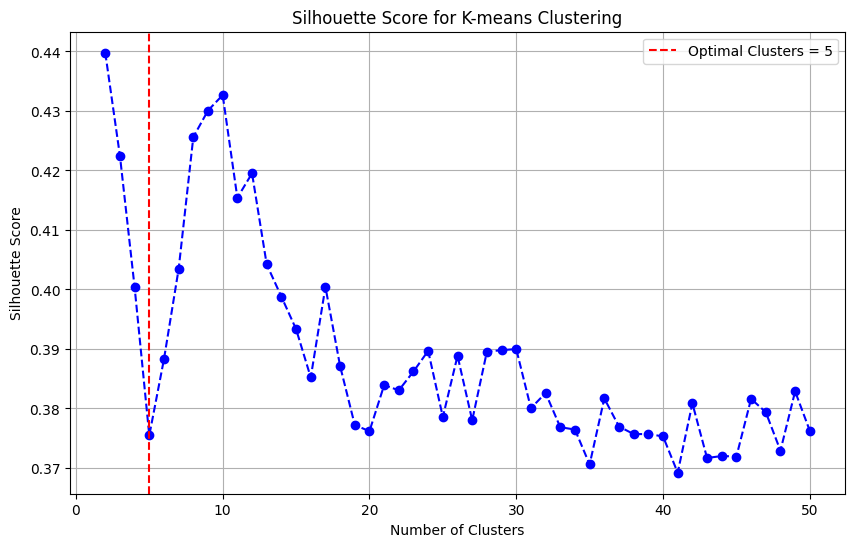

Optimal number of clusters: 5


In [ ]:
X = data_grads_new.values  # Assuming the first column is non-numeric
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 51):  # Increase to desired maximum number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(X_tsne)
    silhouette_scores.append(silhouette_score(X_tsne, cluster_labels))

# Find the first occurrence of a dip in silhouette scores
optimal_clusters = 2  # Default to minimum number of clusters
for i in range(1,len(silhouette_scores)):
    if silhouette_scores[i] > silhouette_scores[i - 1]:
      optimal_clusters = i + 1  # Add 2 because range starts from 2
      break

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 51), silhouette_scores, marker='o', linestyle='--', color='blue')
plt.title('Silhouette Score for K-means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Mark the point corresponding to optimal_clusters
plt.axvline(x=optimal_clusters, color='red', linestyle='--', label=f'Optimal Clusters = {optimal_clusters}')
plt.legend()
plt.show()

print("Optimal number of clusters:", optimal_clusters)

In [ ]:
# Run K-means clustering with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X_tsne)

# Add cluster labels to the original dataset
data_grads_new['Cluster'] = cluster_labels

# Output or use the clustered dataset as needed
data_grads_new.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


slot,19_21,20_22,21_23,22_24,Cluster
stock,,,,,
A,0.11,0.16,-0.02,-0.00,0
AAL,-0.04,0.02,-0.02,-0.00,4
AAPL,0.19,0.18,0.02,0.10,2
ABBV,0.08,0.12,0.12,0.05,3
ABT,0.09,0.08,-0.04,0.00,0


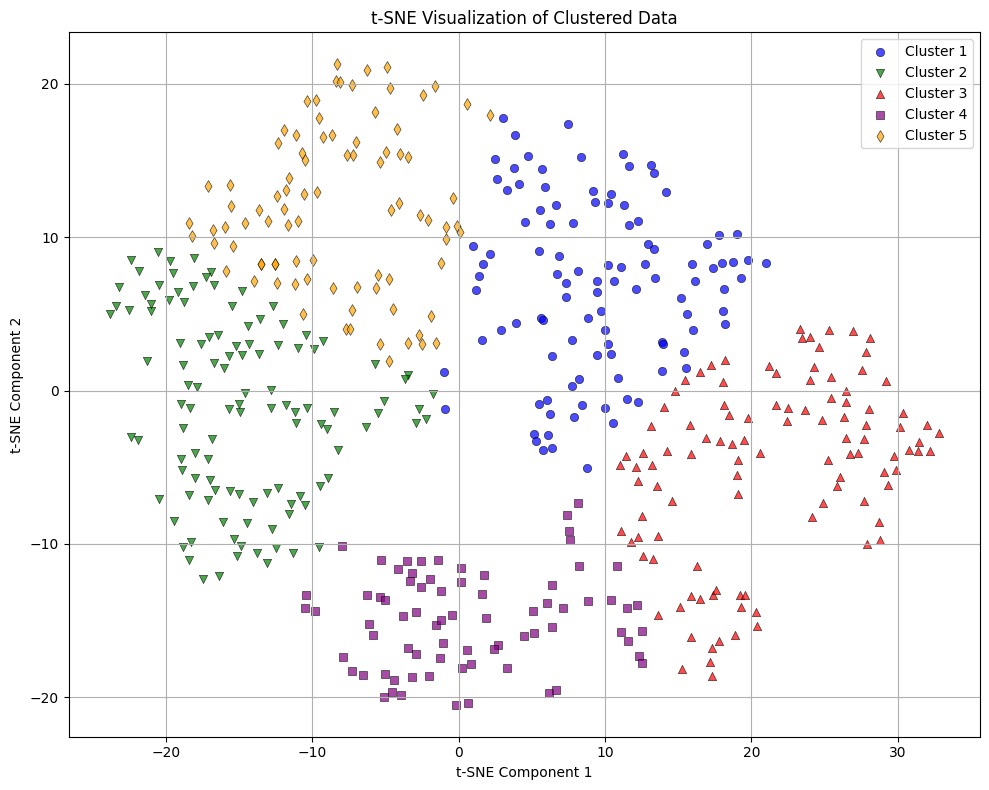

In [ ]:
# Create scatter plot with cluster labels
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']
markers = ['o', 'v', '^', 's', 'd']

for cluster in np.unique(cluster_labels):
    plt.scatter(X_tsne[cluster_labels == cluster, 0],
                X_tsne[cluster_labels == cluster, 1],
                label=f'Cluster {cluster+1}',
                alpha=0.7,
                color=colors[cluster],
                marker=markers[cluster],
                edgecolor='k',  # Black edge for markers
                linewidth=0.5)  # Width of marker edges

plt.title('t-SNE Visualization of Clustered Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()


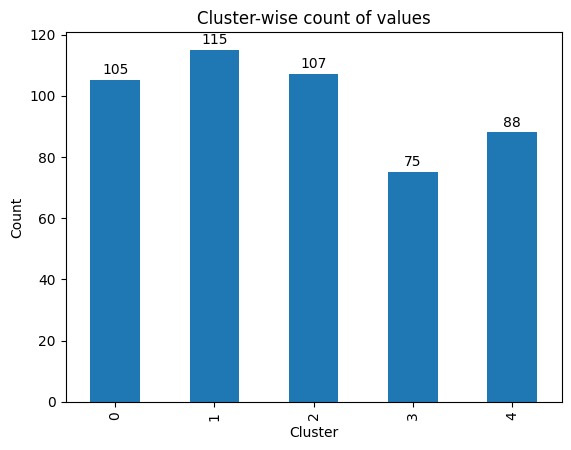

In [ ]:
import matplotlib.pyplot as plt

# Assuming cluster_counts is a pandas Series object with cluster labels as index
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster-wise count of values')

# Add values on top of bars
for i, value in enumerate(cluster_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.show()

In [ ]:
# Show head of data_grads where cluster = X
X=3
data_grads_cluster_X = data_grads_new[data_grads_new['Cluster'] == X]
data_grads_cluster_X.head()

slot,19_21,20_22,21_23,22_24,Cluster
stock,,,,,
ABBV,0.08,0.12,0.12,0.05,3
ADM,0.03,0.08,0.07,-0.05,3
ADP,0.01,0.20,0.10,0.05,3
AJG,0.08,0.17,0.12,0.19,3
ALB,0.17,0.39,0.17,-0.28,3


The list of stocks provided in the cluster 3, they are all publicly traded companies listed on stock exchanges, and they represent a diverse range of industries such as healthcare, technology, energy, consumer goods, and financial services.

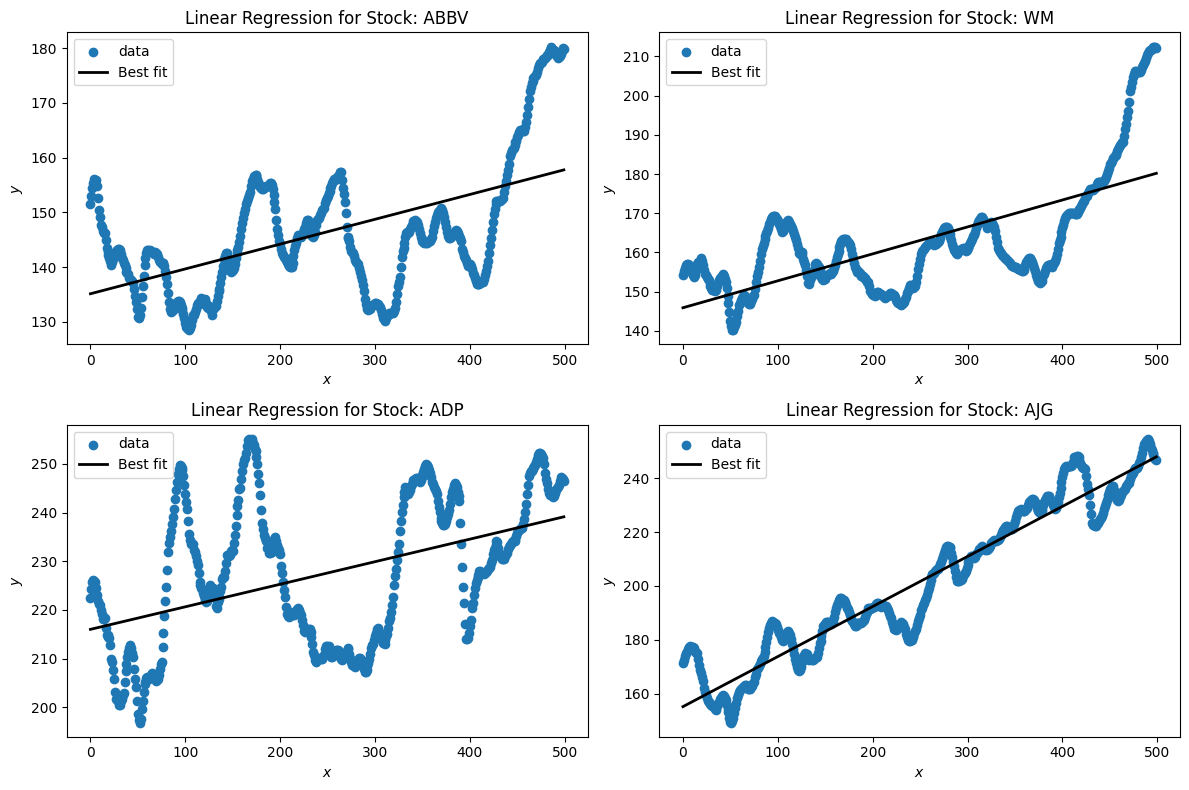

Stock: ABBV
	Best fit gradient: 0.05
	Best fit y-intercept: 135.13

Stock: WM
	Best fit gradient: 0.07
	Best fit y-intercept: 145.89

Stock: ADP
	Best fit gradient: 0.05
	Best fit y-intercept: 216.00

Stock: AJG
	Best fit gradient: 0.19
	Best fit y-intercept: 155.25



In [260]:
import matplotlib.pyplot as plt

def perform_linear_regression(x, y):
    """Perform linear regression and return the coefficients."""
    order = 1  # polynomial of order 1 for a straight line
    coefficients = np.polyfit(x, y, order)
    return coefficients

def plot_regression_line(ax, x, y, coefficients, stock_name):
    """Plot the data and the best-fit regression line."""
    ax.scatter(x, y, label="data")  # plot the data points
    ax.plot(x, [coefficients[1] + i * coefficients[0] for i in x], 'k', lw=2, label="Best fit")  # plot the best-fit line
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_title(f"Linear Regression for Stock: {stock_name}")
    ax.legend()

def plot_linear_regression(stock_name, x, y):
    """Main function to perform linear regression and plot the results."""
    coefficients = perform_linear_regression(x, y)
    return coefficients  # Return the coefficients for plotting later

# Example usage
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

# Stocks to plot
stocks = ['ABBV', 'WM', 'ADP', 'AJG']
coefficients_list = []

for idx, stock_name in enumerate(stocks):
    x = [i for i in range(df_trend.shape[0])]
    y = df_trend[stock_name].values

    # Plot on the corresponding subplot
    row = idx // 2
    col = idx % 2
    coefficients = plot_linear_regression(stock_name, x, y)
    plot_regression_line(axs[row, col], x, y, coefficients, stock_name)
    coefficients_list.append(coefficients)  # Collect coefficients for later use

# Adjust layout and show plots
fig.tight_layout()
plt.show()

# Print the best-fit gradients and y-intercepts
for idx, stock_name in enumerate(stocks):
    print(f"Stock: {stock_name}")
    print(f"\tBest fit gradient: {coefficients_list[idx][0]:.2f}")
    print(f"\tBest fit y-intercept: {coefficients_list[idx][1]:.2f}")
    print()


# END!